In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
elastic_df = pd.read_csv("../data/processed/elastic_sigma.csv")
total_df   = pd.read_csv("../data/processed/total_sigma.csv")


In [4]:
elastic_df["sigma_el_mb"] *= 0.5
elastic_df["delta_sigma_el_mb"] *= 0.5

In [5]:
df = pd.merge(
    elastic_df,
    total_df,
    on="E_MeV",
    how="inner"
)

df

,E_MeV,sigma_el_mb,delta_sigma_el_mb,sigma_tot_mb,delta_sigma_tot_mb
0,300.0,20.015334,2.001533,24.299000,1.00
1,345.0,14.767708,0.284886,24.835473,0.23


In [6]:
assert np.all(df["sigma_el_mb"] < df["sigma_tot_mb"])

In [7]:
df["sigma_inel_mb"] = df["sigma_tot_mb"] - df["sigma_el_mb"]

df["delta_sigma_inel_mb"] = np.sqrt(
    df["delta_sigma_tot_mb"]**2 +
    df["delta_sigma_el_mb"]**2
)

In [8]:
df["P_el"] = df["sigma_el_mb"] / df["sigma_tot_mb"]
df["P_inel"] = 1.0 - df["P_el"]

In [9]:
df["delta_P_el"] = df["P_el"] * np.sqrt(
    (df["delta_sigma_el_mb"] / df["sigma_el_mb"])**2 +
    (df["delta_sigma_tot_mb"] / df["sigma_tot_mb"])**2
)

df["delta_P_inel"] = df["delta_P_el"]

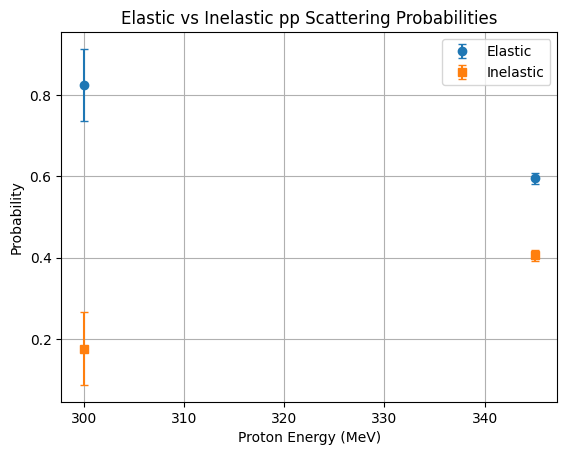

In [10]:
plt.errorbar(df["E_MeV"], df["P_el"], yerr=df["delta_P_el"],
             fmt="o", capsize=3, label="Elastic")

plt.errorbar(df["E_MeV"], df["P_inel"], yerr=df["delta_P_inel"],
             fmt="s", capsize=3, label="Inelastic")

plt.xlabel("Proton Energy (MeV)")
plt.ylabel("Probability")
plt.title("Elastic vs Inelastic pp Scattering Probabilities")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
df.to_csv(
    "../data/processed/pp_scattering_probabilities.csv",
    index=False
)